### File for looking at indices of conf/correct events to see how many are neutral class. 
## Europe.

8/20/2025

This file is specifically for plotting the EOFs cross sections. 

In [1]:
#relevant import statements
import numpy as np
import math
import pandas as pd
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

import collections

In [2]:
def daily_anomaly(target):
    dailymean = np.nanmean(target,axis=1)
    anom = np.zeros_like(target)
    for t in np.arange(target.shape[1]):
         anom[:,t] = target[:,t] - dailymean
    print(anom.shape)
    return anom; 

#_________________________________________________________________
##this instance is just to save the keys so that I can look at composites ... for those dates. 
def compare_keys(list1, list2):
    list1_count = collections.Counter() ##RF counter dictionary
    for day in list1:
        list1_count[day] += 1
    list2_count = collections.Counter() ##LSTM counter dictionary
    for day in list2:
        list2_count[day] += 1
        
    result = []
    list1only = []
    #begin comparing RF and LSTM dictionaries. 
    for key in list1_count:
        if key in list2_count:
            #save the key to look at for composites
            result.append(key)
        if key not in list2_count:
            list1only.append(key)
    
    list2only =[]
    for key in list2_count:
        if key not in list1_count:
            list2only.append(key)
    
    ##I have this set up to look at the SLTM/RF only values too but I may save those for another time. 
    return result, list1only, list2only;
#ultimately these composites would look at the average across the # of shared dates, ignoring the count of them. 

In [3]:
#load input data
infile = open("../../../../REAL/eof_data/vertanom_u.p","rb",)
u_input = pickle.load(infile)  ##vertical U cross section
U_14 = u_input[52:62, 33:168, :, :].reshape((10, 135, 37, 36))
infile.close()

infile = open("../../../../REAL/eof_data/vertanom_ehf.p","rb",)
ehf_input = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
EHF_14 = ehf_input[52:62, 33:168, :, :].reshape((10, 135, 37, 180))
infile.close()

infile = open("../../../../REAL/eof_data/vertanom_gph.p","rb",)
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
GPH_14= gph_input[52:62, 33:168, :, :].reshape((10, 135, 37, 180))
infile.close()

print("U Wind shape: ",U_14.shape)
print("EHF shape: ",EHF_14.shape)
print("GPH shape: ",GPH_14.shape)

##set lat and lon arrays
##separate set of longitudes for PV and others
lat = np.arange(90, 18, -2)
print("Len latitudes: ", len(lat))
lon = np.arange(0, 360, 2)
print("Len longitudes: ", len(lon))


lev = np.array([1., 2., 3., 5., 7., 10., 20., 30., 50., 70., 100., 125., 150., 175., 200., 225., 250., 300., 350., 400., 
                450., 500., 550., 600., 650., 700., 750., 775., 800., 825., 850., 875., 900., 925., 950., 975., 1000.])
print("Len levels: ", len(lev))

U Wind shape:  (10, 135, 37, 36)
EHF shape:  (10, 135, 37, 180)
GPH shape:  (10, 135, 37, 180)
Len latitudes:  36
Len longitudes:  180
Len levels:  37


Open index files and temp files. 

In [5]:
##open indice files
infile = open("../../../RF_indices/posXtest_eurLSTM.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("../../../RF_indices/FposXtest_eurLSTM.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("../../../RF_indices/negXtest_eurLSTM.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("../../../RF_indices/FnegXtest_eurLSTM.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

infile = open("../../../data/eur_anomtemps_3_15std.p", 'rb') 
temps = pickle.load(infile)
infile.close()

temps = temps.reshape((62,149))
temp = temps[52:,14:]

In [6]:
temp.shape

(10, 135)

### These few cells will be for making box plots instead lol. 

It is important to keep in mind that there are also just proportionally less pos and neg temp extremes left as I increase the classification criterion (i.e., +1.5 std) ... SO regardless of whether they are proportionally more events, there are still less to choose from ... if that makes sense?

In [7]:
###now I wanna make these plots SO ... I am adding an index column on to X_test ... full version. 
ranges = np.array([x for x in range(0,135*10,1)])
ranges = ranges.reshape(10,135) 
ranges.shape

(10, 135)

In [8]:
##Correct Positive Events
posXtest_set = set(posXtest)

negcorr_indices = [] 
poscorr_indices = [] 
neutcorrP_indices = []

U_cpos = []
EHF_cpos = []
GPH_cpos = []

U_Pneut = []
EHF_Pneut = []
GPH_Pneut = []


for i in range(10):
    for j in range(135):
        date_index = ranges[i, j]
        if date_index not in posXtest_set:
            continue
        value = temp[i, j]
        if value == 0:
            negcorr_indices.append(date_index)
        elif value == 1:
            poscorr_indices.append(date_index)
            U_cpos.extend(U_14[i,j,:,:])
            EHF_cpos.extend(EHF_14[i,j,:,:])
            GPH_cpos.extend(GPH_14[i,j,:,:])
        elif value == 2:
            neutcorrP_indices.append(date_index)
            U_Pneut.extend(U_14[i,j,:,:])
            EHF_Pneut.extend(EHF_14[i,j,:,:])
            GPH_Pneut.extend(GPH_14[i,j,:,:])

print("Number of Positive and Correct, Negative Temp Anoms: ",str(len(poscorr_indices)))
print("Number of Positive and Correct, Neutral Temp Anoms: ",str(len(neutcorrP_indices)))

count, true, neut = compare_keys(poscorr_indices, neutcorrP_indices)
print("There are "+str(len(count))+" shared indices. There are "+str(len(true))+" unique events for True Positives and "+str(len(neut))+" for neutral.")

##reshape
U_cpos = np.array(U_cpos).reshape(len(poscorr_indices),37,36)
EHF_cpos = np.array(EHF_cpos).reshape(len(poscorr_indices),37,180)
GPH_cpos = np.array(GPH_cpos).reshape(len(poscorr_indices),37,180)

U_Pneut = np.array(U_Pneut).reshape(len(neutcorrP_indices),37,36)
EHF_Pneut = np.array(EHF_Pneut).reshape(len(neutcorrP_indices),37,180)
GPH_Pneut = np.array(GPH_Pneut).reshape(len(neutcorrP_indices),37,180)

Number of Positive and Correct, Negative Temp Anoms:  9
Number of Positive and Correct, Neutral Temp Anoms:  174
There are 0 shared indices. There are 9 unique events for True Positives and 174 for neutral.


In [9]:
#Correct Negative
negXtest_set = set(negXtest)

negcorr_indices = [] 
poscorr_indices = [] 
neutcorrN_indices = []

U_cneg = []
EHF_cneg = []
GPH_cneg = []

U_Nneut = []
EHF_Nneut = []
GPH_Nneut = []


for i in range(10):
    for j in range(135):
        date_index = ranges[i, j]
        if date_index not in negXtest_set:
            continue
        value = temp[i, j]
        if value == 0:
            negcorr_indices.append(date_index)
            U_cneg.extend(U_14[i,j,:,:])
            EHF_cneg.extend(EHF_14[i,j,:,:])
            GPH_cneg.extend(GPH_14[i,j,:,:])
        elif value == 1:
            poscorr_indices.append(date_index)
        elif value == 2:
            neutcorrN_indices.append(date_index)
            U_Nneut.extend(U_14[i,j,:,:])
            EHF_Nneut.extend(EHF_14[i,j,:,:])
            GPH_Nneut.extend(GPH_14[i,j,:,:])

print("Number of Positive and Correct, Negative Temp Anoms: ",str(len(negcorr_indices)))
print("Number of Positive and Correct, Neutral Temp Anoms: ",str(len(neutcorrN_indices)))

count, true, neut = compare_keys(negcorr_indices, neutcorrN_indices)
print("There are "+str(len(count))+" shared indices. There are "+str(len(true))+" unique events for True Positives and "+str(len(neut))+" for neutral.")

##reshape
U_cneg = np.array(U_cneg).reshape(len(negcorr_indices),37,36)
EHF_cneg = np.array(EHF_cneg).reshape(len(negcorr_indices),37,180)
GPH_cneg = np.array(GPH_cneg).reshape(len(negcorr_indices),37,180)

U_Nneut = np.array(U_Nneut).reshape(len(neutcorrN_indices),37,36)
EHF_Nneut = np.array(EHF_Nneut).reshape(len(neutcorrN_indices),37,180)
GPH_Nneut = np.array(GPH_Nneut).reshape(len(neutcorrN_indices),37,180)

Number of Positive and Correct, Negative Temp Anoms:  84
Number of Positive and Correct, Neutral Temp Anoms:  467
There are 0 shared indices. There are 84 unique events for True Positives and 467 for neutral.


In [11]:
##False Positive Events
FposXtest_set = set(FposXtest)

Fnegcorr_indices = [] 
Fposcorr_indices = [] 
FneutcorrP_indices = [] 

U_Fpos = []
EHF_Fpos = []
GPH_Fpos = []

U_FPneut = []
EHF_FPneut = []
GPH_FPneut = []


for i in range(10):
    for j in range(135):
        date_index = ranges[i, j]
        if date_index not in FposXtest_set:
            continue
        value = temp[i, j]
        if value == 0:
            Fnegcorr_indices.append(date_index)
            U_Fpos.extend(U_14[i,j,:,:])
            EHF_Fpos.extend(EHF_14[i,j,:,:])
            GPH_Fpos.extend(GPH_14[i,j,:,:])
        elif value == 1:
            poscorr_indices.append(date_index)
        elif value == 2:
            FneutcorrP_indices.append(date_index)
            U_FPneut.extend(U_14[i,j,:,:])
            EHF_FPneut.extend(EHF_14[i,j,:,:])
            GPH_FPneut.extend(GPH_14[i,j,:,:])

print("Number of Positive and Correct, Negative Temp Anoms: ",str(len(Fnegcorr_indices)))
print("Number of Positive and Correct, Neutral Temp Anoms: ",str(len(FneutcorrP_indices)))

count, true, neut = compare_keys(Fnegcorr_indices, FneutcorrP_indices)
print("There are "+str(len(count))+" shared indices. There are "+str(len(true))+" unique events for True Positives and "+str(len(neut))+" for neutral.")

##reshape
U_Fpos = np.array(U_Fpos).reshape(len(Fnegcorr_indices),37,36)
EHF_Fpos = np.array(EHF_Fpos).reshape(len(Fnegcorr_indices),37,180)
GPH_Fpos = np.array(GPH_Fpos).reshape(len(Fnegcorr_indices),37,180)

U_FPneut = np.array(U_FPneut).reshape(len(FneutcorrP_indices),37,36)
EHF_FPneut = np.array(EHF_FPneut).reshape(len(FneutcorrP_indices),37,180)
GPH_FPneut = np.array(GPH_FPneut).reshape(len(FneutcorrP_indices),37,180)

#False Negative
FnegXtest_set = set(FnegXtest)

Fnegcorr_indices = [] 
Fposcorr_indices = [] 
FneutcorrN_indices = [] 

U_Fneg = []
EHF_Fneg = []
GPH_Fneg = []

U_FNneut = []
EHF_FNneut = []
GPH_FNneut = []


for i in range(10):
    for j in range(135):
        date_index = ranges[i, j]
        if date_index not in FnegXtest_set:
            continue
        value = temp[i, j]
        if value == 0:
            Fnegcorr_indices.append(date_index)
        elif value == 1:
            Fposcorr_indices.append(date_index)
            U_Fneg.extend(U_14[i,j,:,:])
            EHF_Fneg.extend(EHF_14[i,j,:,:])
            GPH_Fneg.extend(GPH_14[i,j,:,:])
        elif value == 2:
            FneutcorrN_indices.append(date_index)
            U_FNneut.extend(U_14[i,j,:,:])
            EHF_FNneut.extend(EHF_14[i,j,:,:])
            GPH_FNneut.extend(GPH_14[i,j,:,:])

print("Number of Positive and Correct, Negative Temp Anoms: ",str(len(Fposcorr_indices)))
print("Number of Positive and Correct, Neutral Temp Anoms: ",str(len(FneutcorrN_indices)))

count, true, neut = compare_keys(Fposcorr_indices, FneutcorrN_indices)
print("There are "+str(len(count))+" shared indices. There are "+str(len(true))+" unique events for True Positives and "+str(len(neut))+" for neutral.")

##reshape
U_Fneg = np.array(U_Fneg).reshape(len(Fposcorr_indices),37,36)
EHF_Fneg = np.array(EHF_Fneg).reshape(len(Fposcorr_indices),37,180)
GPH_Fneg = np.array(GPH_Fneg).reshape(len(Fposcorr_indices),37,180)

U_FNneut = np.array(U_FNneut).reshape(len(FneutcorrN_indices),37,36)
EHF_FNneut = np.array(EHF_FNneut).reshape(len(FneutcorrN_indices),37,180)
GPH_FNneut = np.array(GPH_FNneut).reshape(len(FneutcorrN_indices),37,180)


Number of Positive and Correct, Negative Temp Anoms:  7
Number of Positive and Correct, Neutral Temp Anoms:  171
There are 0 shared indices. There are 7 unique events for True Positives and 171 for neutral.
Number of Positive and Correct, Negative Temp Anoms:  5
Number of Positive and Correct, Neutral Temp Anoms:  202
There are 0 shared indices. There are 5 unique events for True Positives and 202 for neutral.


## Actual Temp Anoms. 

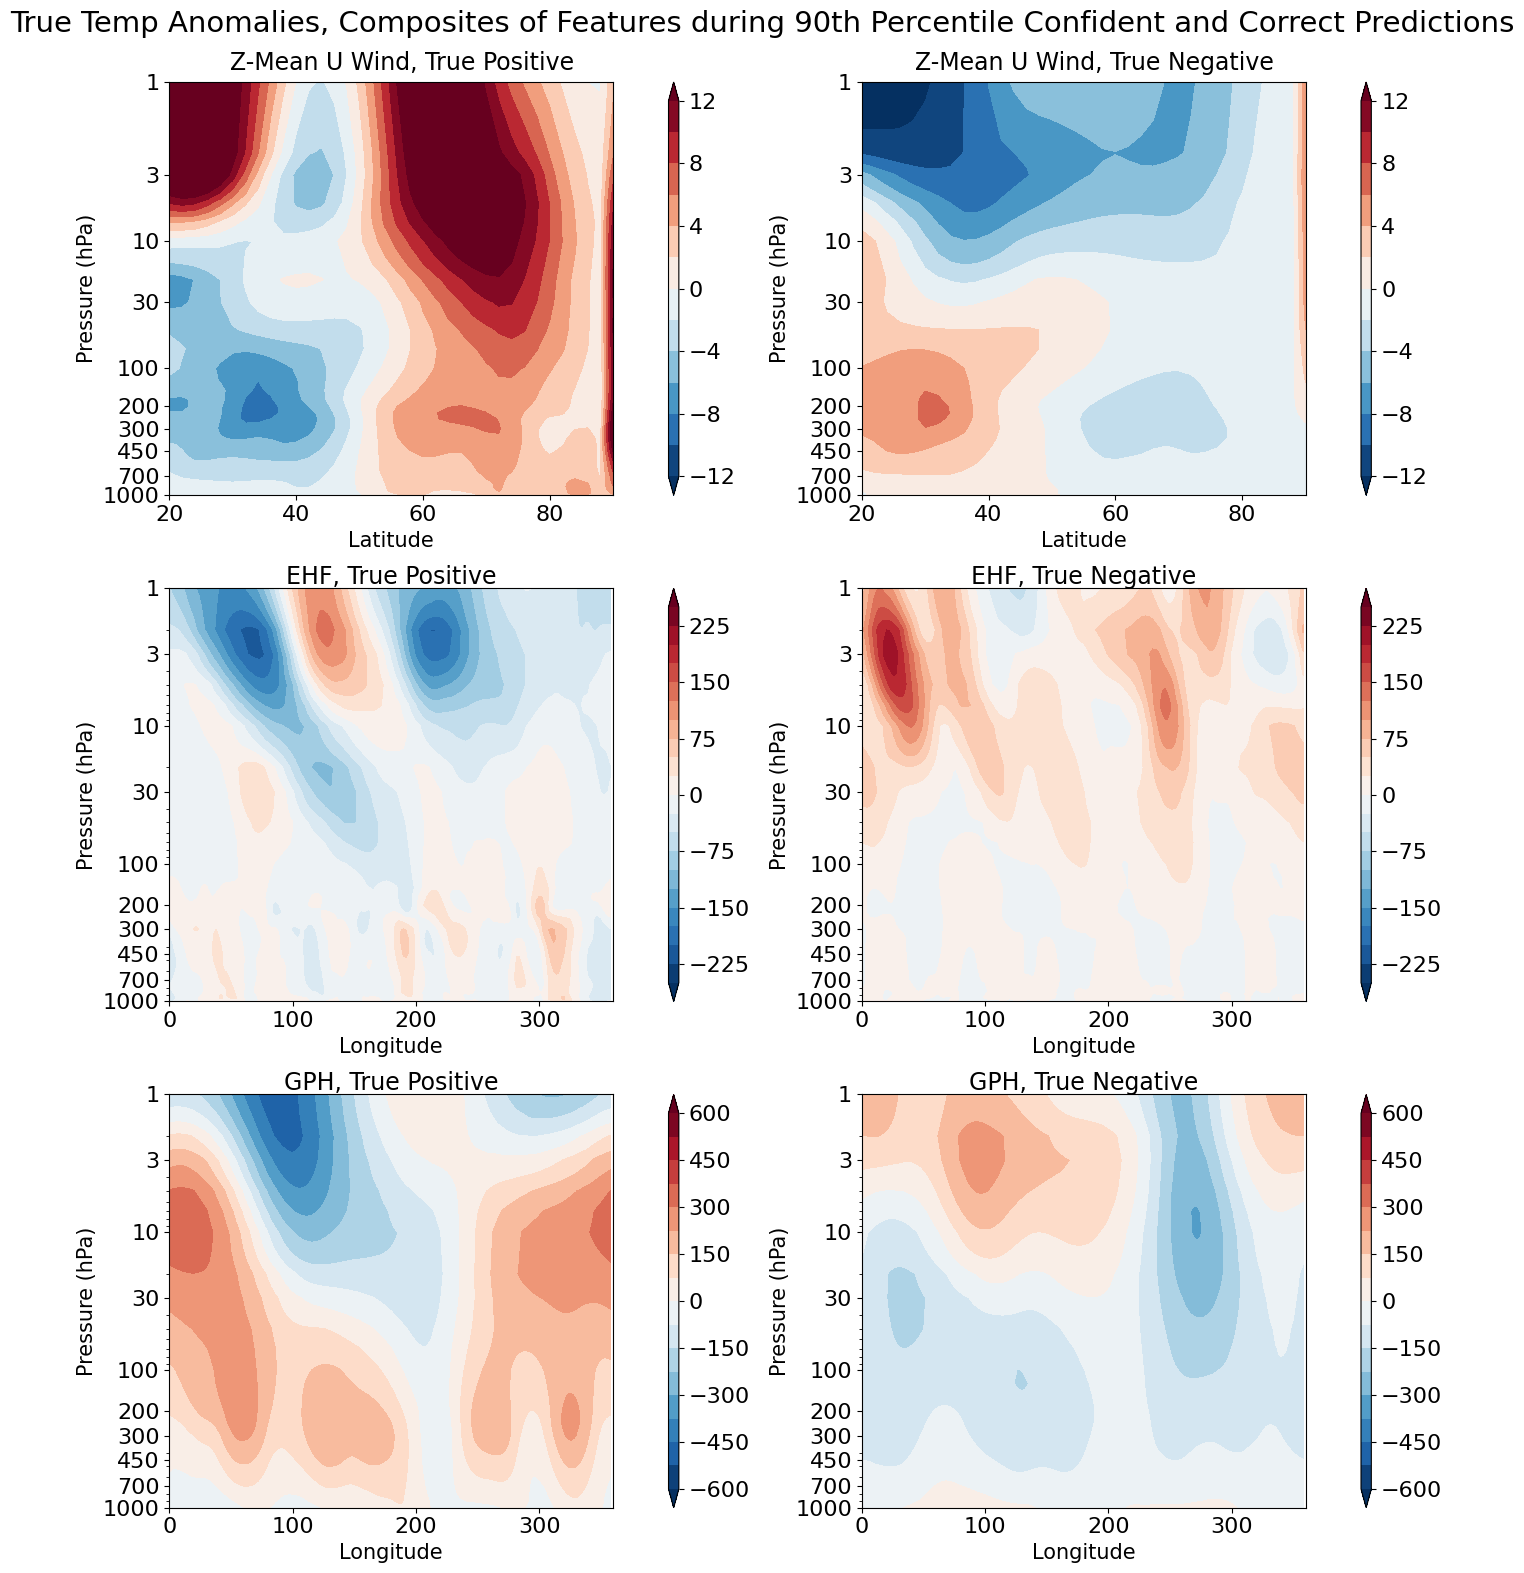

In [12]:
fs = 18
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
plt.suptitle("True Temp Anomalies, Composites of Features during 90th Percentile Confident and Correct Predictions",fontsize=21)   

titles = ["True Positive", "True Negative"]
data = [U_cpos,U_cneg,
        EHF_cpos,EHF_cneg,
        GPH_cpos,GPH_cneg]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 6):
    color = "RdBu_r"
    # colorbar options:
    if i == 0 or i ==1:
        colorbarMin = -12
        colorbarMax = 12
        colorspace = 2

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("Z-Mean U Wind, "+str(titles[i]), fontsize=fs-1, y=1.01,x=0.525)

        h = axes[i].contourf(
            lat,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        # colorLabel='Z (m)'
        # cbar.set_label(label=colorLabel,fontsize=10)

        axes[i].tick_params(labelsize=fs-2)
        axes[i].invert_yaxis()
        axes[i].set_yscale('symlog')
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(20, 90)
        axes[i].set_xlabel('Latitude', fontsize=fs-3)
                          
    if i == 2 or i == 3:
        colorbarMin = -250
        colorbarMax = 250
        colorspace = 25

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("EHF, "+str(titles[i-2]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)
                          
    if i == 4 or i == 5:
        colorbarMin = -600
        colorbarMax = 600
        colorspace = 75

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("GPH, "+str(titles[i-4]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)


plt.tight_layout()
plt.subplots_adjust(top=0.935)
plt.savefig("Truetemp_Comps_CorrectLSTM.png",bbox_inches = 'tight')
plt.show()

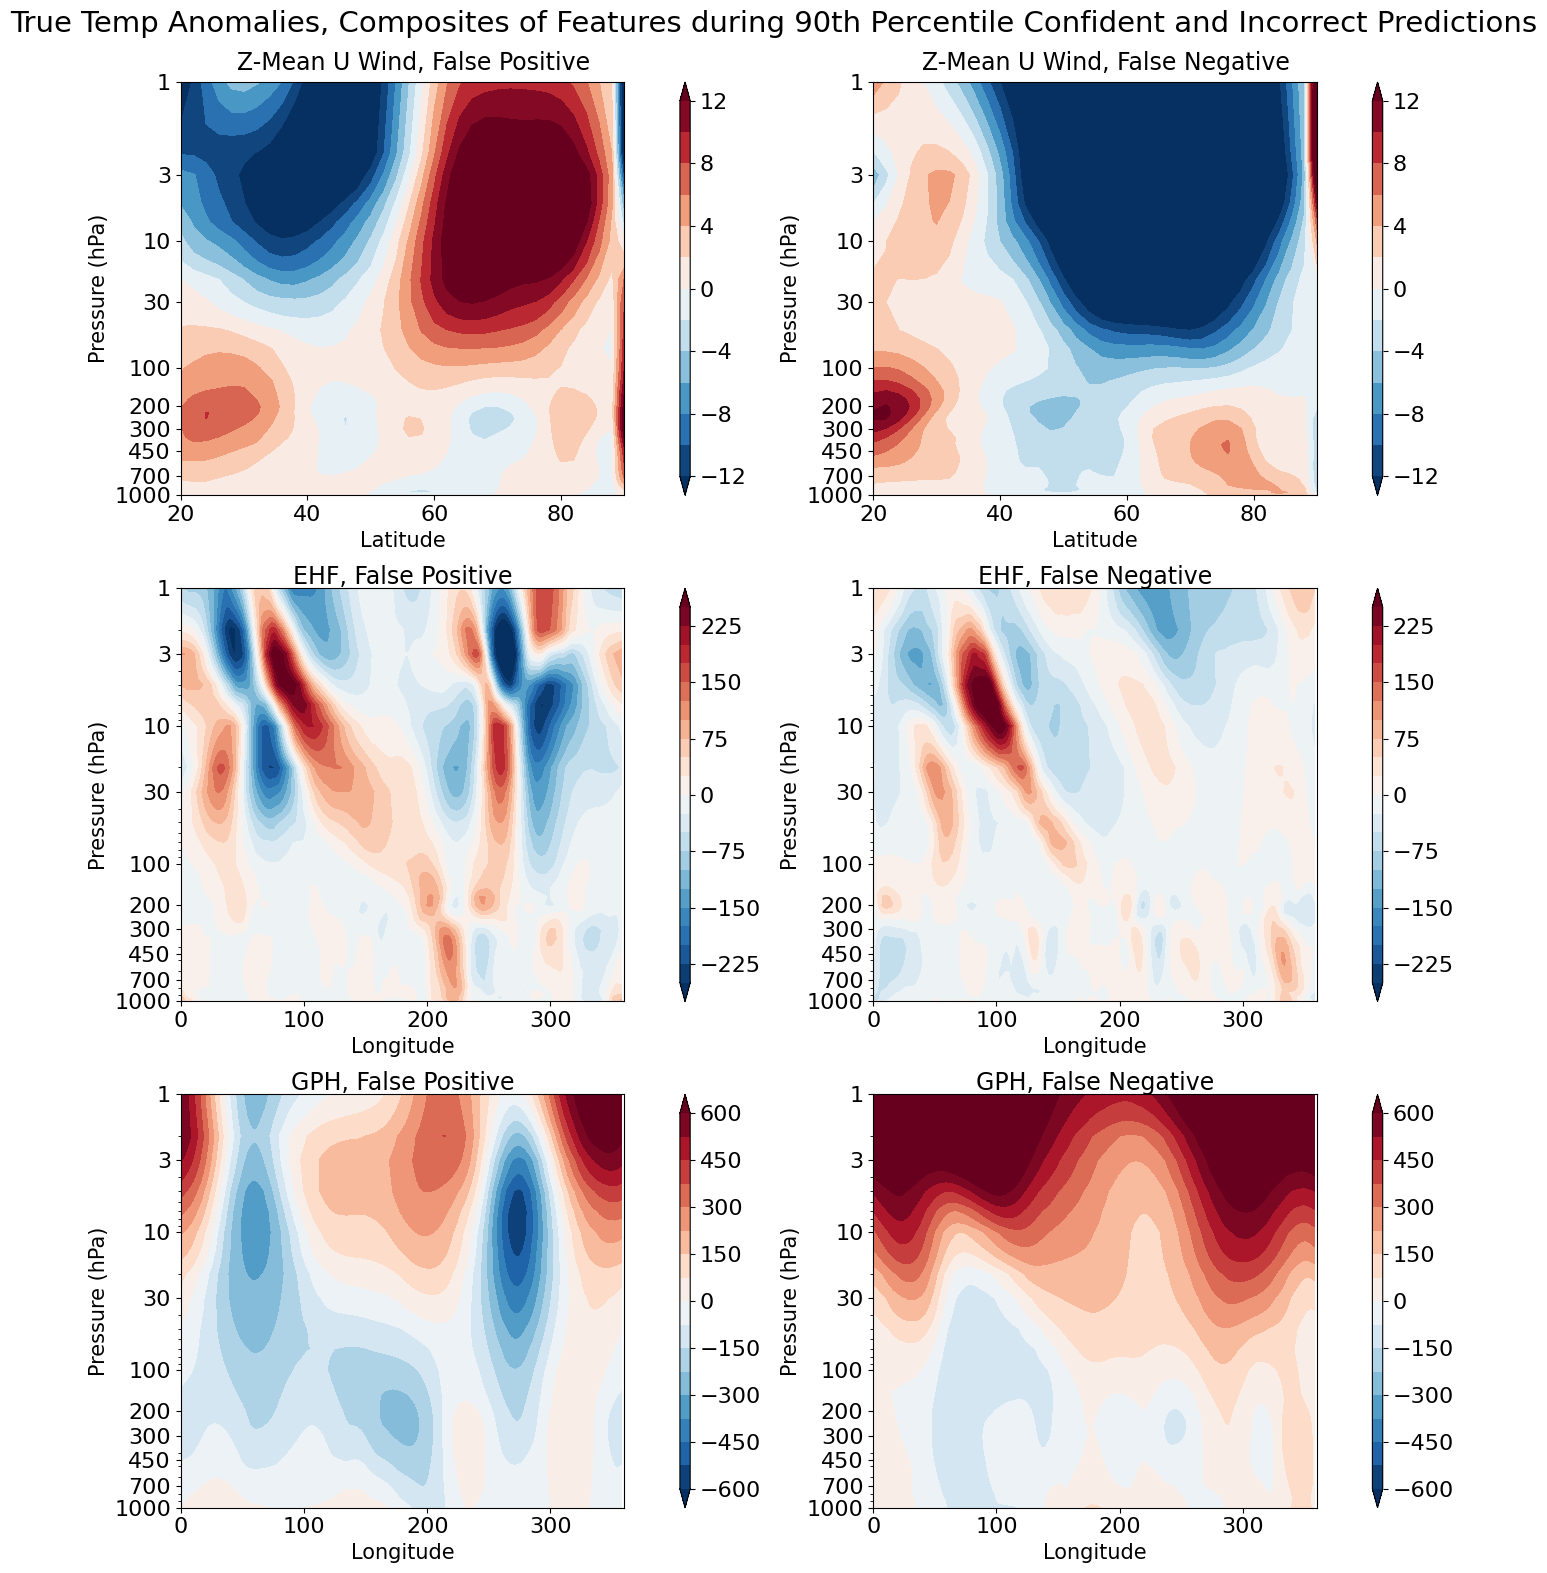

In [16]:
fs = 18
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
plt.suptitle("True Temp Anomalies, Composites of Features during 90th Percentile Confident and Incorrect Predictions",fontsize=21)   

titles = ["False Positive", "False Negative"]
data = [U_Fpos,U_Fneg,
        EHF_Fpos,EHF_Fneg,
        GPH_Fpos,GPH_Fneg]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 6):
    color = "RdBu_r"
    # colorbar options:
    if i == 0 or i ==1:
        colorbarMin = -12
        colorbarMax = 12
        colorspace = 2

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("Z-Mean U Wind, "+str(titles[i]), fontsize=fs-1, y=1.01,x=0.525)

        h = axes[i].contourf(
            lat,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        # colorLabel='Z (m)'
        # cbar.set_label(label=colorLabel,fontsize=10)

        axes[i].tick_params(labelsize=fs-2)
        axes[i].invert_yaxis()
        axes[i].set_yscale('symlog')
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(20, 90)
        axes[i].set_xlabel('Latitude', fontsize=fs-3)
                          
    if i == 2 or i == 3:
        colorbarMin = -250
        colorbarMax = 250
        colorspace = 25

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("EHF, "+str(titles[i-2]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)
                          
    if i == 4 or i == 5:
        colorbarMin = -600
        colorbarMax = 600
        colorspace = 75

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("GPH, "+str(titles[i-4]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)


plt.tight_layout()
plt.subplots_adjust(top=0.935)
plt.savefig("Truetemp_Comps_IncorrectLSTM.png",bbox_inches = 'tight')
plt.show()

## Neutral. 

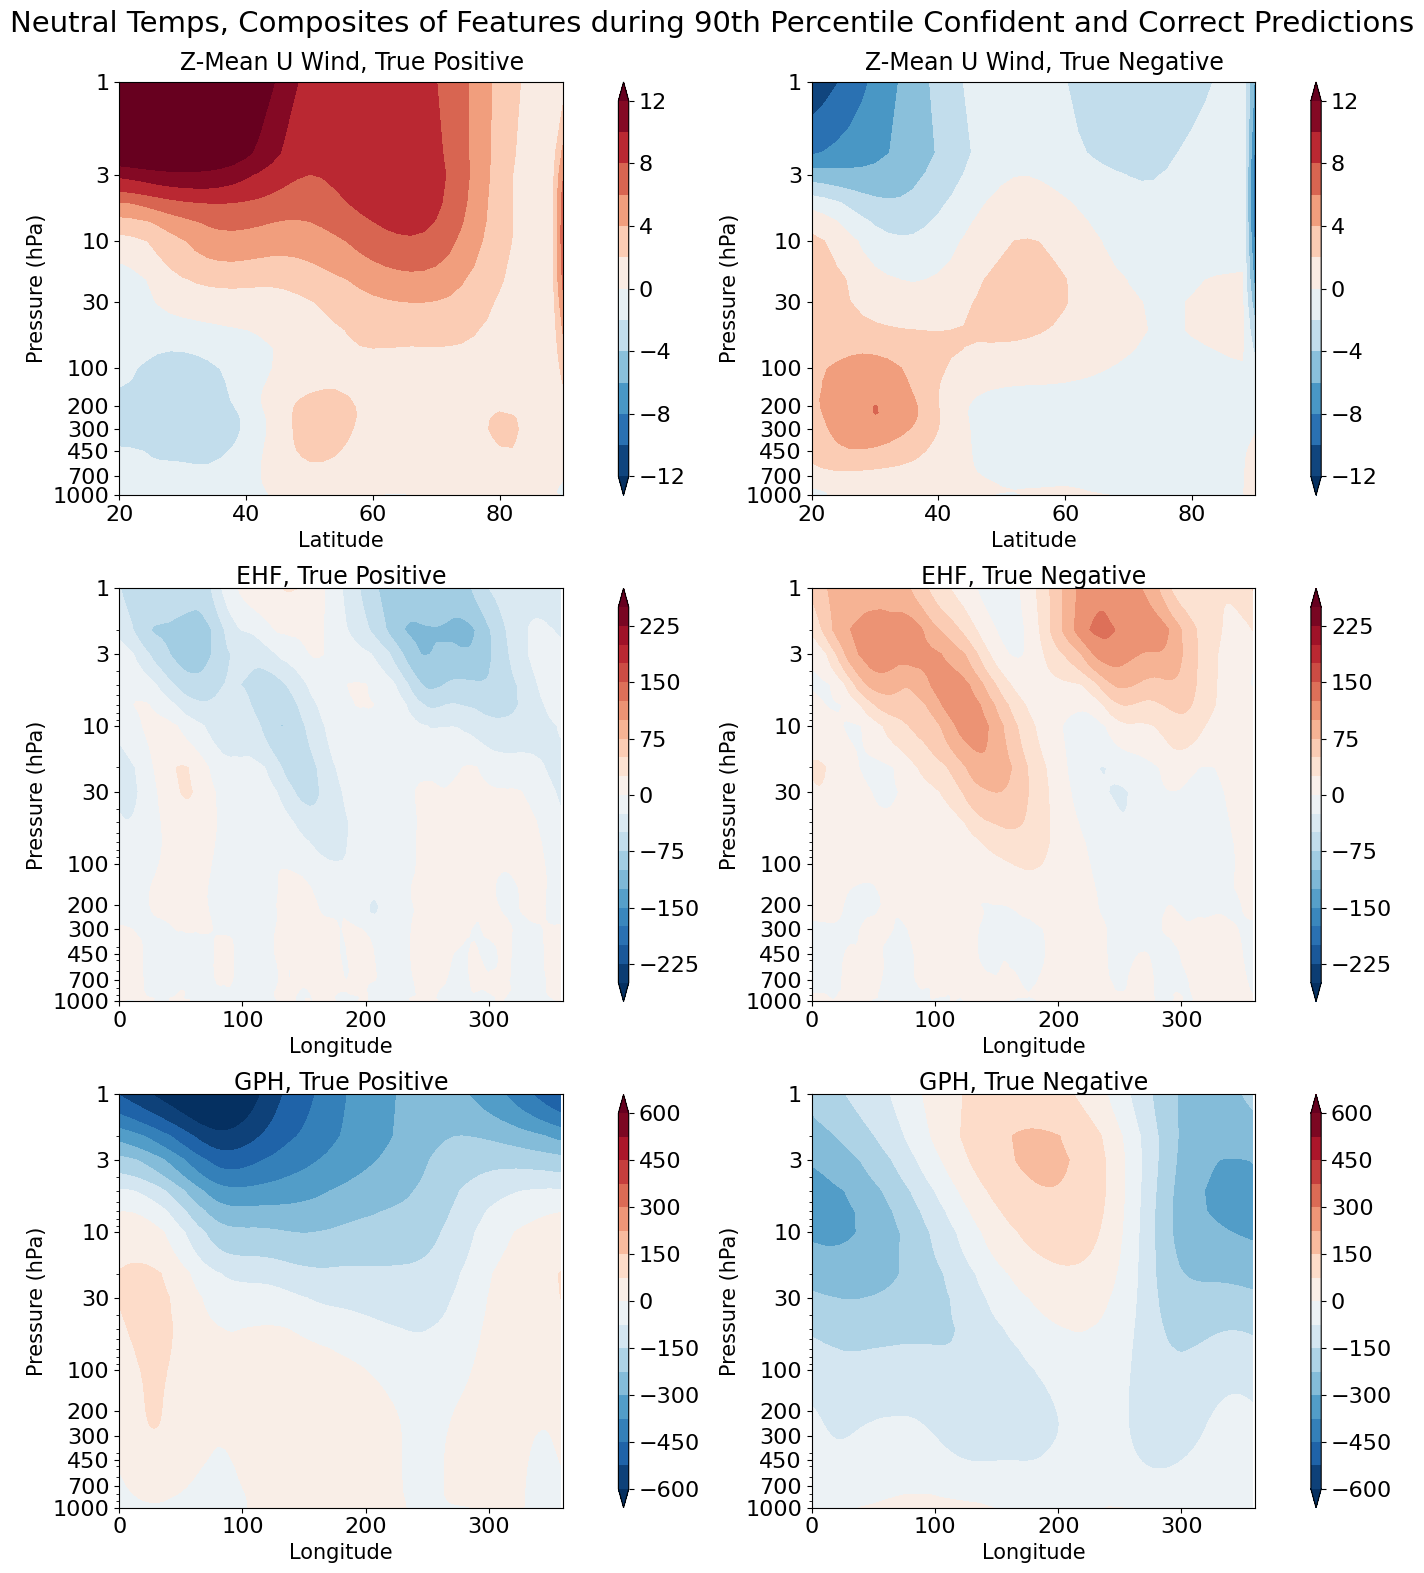

In [13]:
fs = 18
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
plt.suptitle("Neutral Temps, Composites of Features during 90th Percentile Confident and Correct Predictions",fontsize=21)   

titles = ["True Positive", "True Negative"]
data = [U_Pneut,U_Nneut,
        EHF_Pneut,EHF_Nneut,
        GPH_Pneut,GPH_Nneut]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 6):
    color = "RdBu_r"
    # colorbar options:
    if i == 0 or i ==1:
        colorbarMin = -12
        colorbarMax = 12
        colorspace = 2

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("Z-Mean U Wind, "+str(titles[i]), fontsize=fs-1, y=1.01,x=0.525)

        h = axes[i].contourf(
            lat,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        # colorLabel='Z (m)'
        # cbar.set_label(label=colorLabel,fontsize=10)

        axes[i].tick_params(labelsize=fs-2)
        axes[i].invert_yaxis()
        axes[i].set_yscale('symlog')
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(20, 90)
        axes[i].set_xlabel('Latitude', fontsize=fs-3)
                          
    if i == 2 or i == 3:
        colorbarMin = -250
        colorbarMax = 250
        colorspace = 25

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("EHF, "+str(titles[i-2]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)
                          
    if i == 4 or i == 5:
        colorbarMin = -600
        colorbarMax = 600
        colorspace = 75

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("GPH, "+str(titles[i-4]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)


plt.tight_layout()
plt.subplots_adjust(top=0.935)
plt.savefig("Neuttemp_Comps_CorrectLSTM.png",bbox_inches = 'tight')
plt.show()

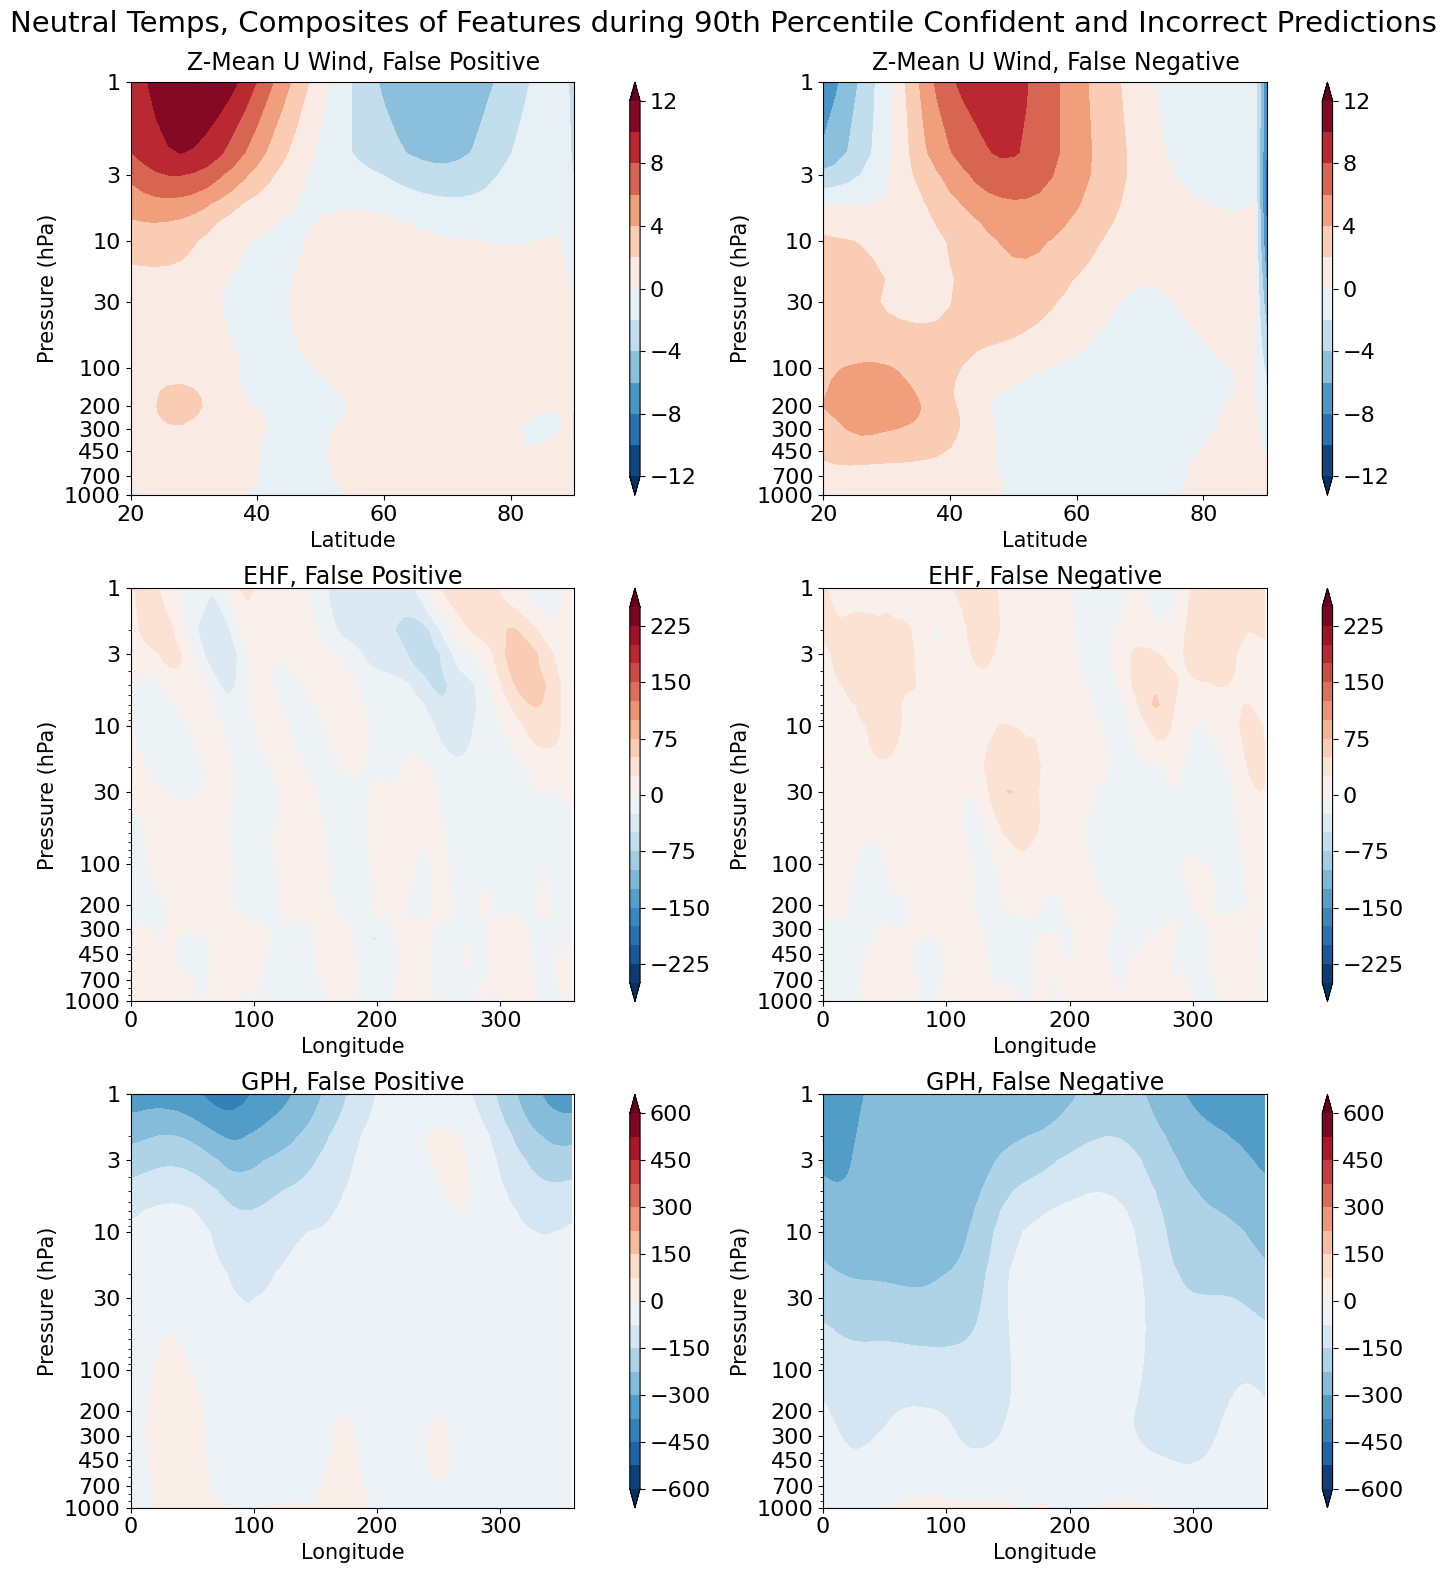

In [14]:
fs = 18
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
plt.suptitle("Neutral Temps, Composites of Features during 90th Percentile Confident and Incorrect Predictions",fontsize=21)   

titles = ["False Positive", "False Negative"]
data = [U_FPneut,U_FNneut,
        EHF_FPneut,EHF_FNneut,
        GPH_FPneut,GPH_FNneut]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 6):
    color = "RdBu_r"
    # colorbar options:
    if i == 0 or i ==1:
        colorbarMin = -12
        colorbarMax = 12
        colorspace = 2

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("Z-Mean U Wind, "+str(titles[i]), fontsize=fs-1, y=1.01,x=0.525)

        h = axes[i].contourf(
            lat,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        # colorLabel='Z (m)'
        # cbar.set_label(label=colorLabel,fontsize=10)

        axes[i].tick_params(labelsize=fs-2)
        axes[i].invert_yaxis()
        axes[i].set_yscale('symlog')
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(20, 90)
        axes[i].set_xlabel('Latitude', fontsize=fs-3)
                          
    if i == 2 or i == 3:
        colorbarMin = -250
        colorbarMax = 250
        colorspace = 25

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("EHF, "+str(titles[i-2]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)
                          
    if i == 4 or i == 5:
        colorbarMin = -600
        colorbarMax = 600
        colorspace = 75

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("GPH, "+str(titles[i-4]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)


plt.tight_layout()
plt.subplots_adjust(top=0.935)
plt.savefig("Neuttemp_Comps_InorrectLSTM.png",bbox_inches = 'tight')
plt.show()